In [1]:
# Initial imports
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
file_path = "crypto_data.csv"
df = pd.read_csv(file_path)

In [3]:
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
df1 = df.loc[df['IsTrading'] == True]
df1

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
df2 = df1.dropna()
df2

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
df3 = df2.loc[df['TotalCoinsMined'] > 0]
df3

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
df4 = df3.drop(['CoinName'], axis=1)
df4

,Unnamed: 0,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
df5 = df4.drop(['Unnamed: 0'], axis=1)
df5

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,X13,True,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [9]:
df6 = df5.drop(['IsTrading'], axis=1)
df6

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
df7 = pd.get_dummies(df6, columns = ['Algorithm', 'ProofType']\
                     ,prefix='Algorithm',drop_first=True)
df7

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,Algorithm_PoW/PoS,Algorithm_PoW/PoS,Algorithm_PoW/PoW,Algorithm_PoW/nPoS,Algorithm_Pos,Algorithm_Proof of Authority,Algorithm_Proof of Trust,Algorithm_TPoS,Algorithm_Zero-Knowledge Proof,Algorithm_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using PCA

In [11]:
# Standarize data with StandarScaler
crypto_scaled = StandardScaler().fit_transform(df7)


In [12]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.99)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [13]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca )
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.335914,1.043405,-0.537409,0.001347,7.044362e-14,-8.714740e-15,-0.013578,-1.329940,-0.053106,-0.333927,...,7.334936e-15,-0.673203,0.194412,0.147621,0.288023,-0.632221,-0.114883,0.129966,-0.116697,0.010409
1,-0.319249,1.043547,-0.537804,0.001337,7.045326e-14,-8.731066e-15,-0.014190,-1.332705,-0.057966,-0.330612,...,7.353770e-15,-0.673205,0.194440,0.147574,0.287949,-0.632084,-0.114755,0.130044,-0.116405,0.010254
2,2.304716,1.669996,-0.624077,0.004420,1.091008e-13,-1.482739e-14,-0.062312,-1.554093,-0.945690,0.375087,...,-8.368231e-14,0.622846,0.421364,0.267777,-0.289432,0.451847,-0.447746,-0.067626,0.181645,-1.392436
3,-0.145455,-1.323925,0.177429,-0.001167,-2.770382e-14,3.303192e-15,0.000326,0.283548,0.252906,-0.079820,...,-1.319584e-14,0.241300,0.162644,0.130814,-0.104293,0.456301,-0.089618,-0.313484,0.002433,0.175239
4,-0.151951,-2.044976,0.364208,-0.001636,-5.536610e-14,5.409159e-15,0.032350,0.524429,0.191031,0.074021,...,-2.040253e-14,0.228829,-0.074238,0.358348,0.621591,-0.650725,-0.113560,0.100550,0.044584,0.017221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471052,0.822640,-0.090393,-0.007473,5.247329e-14,-1.317839e-14,-0.848840,2.044413,3.558069,-2.407272,...,-1.037607e-14,0.270277,0.150681,0.202135,0.165003,-0.057671,-0.156907,-0.074121,0.067789,0.324646
528,-0.333959,1.043287,-0.537434,0.001349,7.040537e-14,-8.793717e-15,-0.013603,-1.330309,-0.053753,-0.333480,...,7.224467e-15,-0.673190,0.194410,0.147609,0.288100,-0.632215,-0.115097,0.130265,-0.116547,0.008971
529,0.324179,-2.322781,0.387363,-0.001291,-5.406080e-14,6.373632e-15,0.022272,0.167091,-0.044758,0.260887,...,-3.293309e-14,0.188104,-0.020976,-0.013375,0.604075,-0.662135,0.113374,0.229270,-0.011890,0.462540
530,-0.149546,-2.058994,0.379620,-0.001675,-5.756609e-14,6.921264e-15,0.033758,0.550420,0.235951,0.074012,...,6.463270e-15,-0.153905,0.022939,-0.090683,-4.159657,-1.869947,-0.126624,0.357084,0.082477,-0.070682


In [14]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043

## Running KMeans with PCA Data

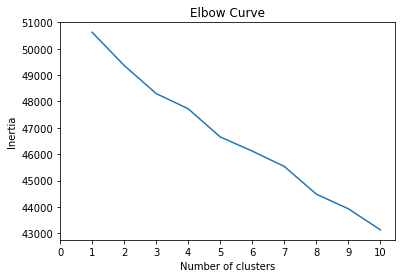

In [15]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# Get predictions
# Initializing model with K = 3 (since we already know there are three classes of iris plants)

model = KMeans(n_clusters=3, random_state=5)
model.fit(df_crypto_pca)
predictions = model.predict(df_crypto_pca)
len(predictions)

532

In [17]:
df3['prediction']=predictions
df3

C:\Users\dri90\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,prediction
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42,2
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000,2
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000,2
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0,2
...,...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000,2
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000,2
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610,2
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000,2


## Running Tsne

In [18]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [19]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

In [20]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [21]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

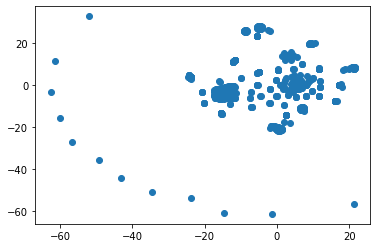

In [22]:
# Visualize the clusters
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

In [23]:
df_crypto_pca['x']

0     -11.639640
1     -15.906157
2     -23.879648
3      -4.498878
4      16.187044
         ...    
527    -2.536909
528   -17.406940
529    21.514591
530    17.111736
531     3.818939
Name: x, Length: 532, dtype: float32

In [24]:
df_crypto_pca['y']

0      -1.236406
1      -6.633682
2       2.573864
3      27.102472
4      -7.678356
         ...    
527    25.997444
528    -3.225272
529     7.881597
530    -0.202230
531    13.350989
Name: y, Length: 532, dtype: float32

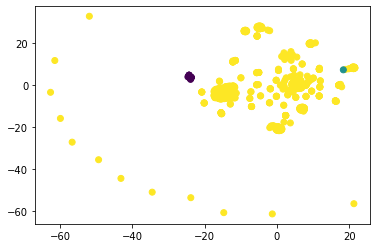

In [25]:
# Visualize the clusters with color
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'], c=predictions)
plt.show()